<a href="https://colab.research.google.com/github/vikraj-ai/Hi/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:




# Import necessary libraries
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Step 1: Clone the GitHub repository
!git clone https://github.com/vikraj-ai/Pytorch
os.chdir('Pytorch')

# Step 2: Install necessary dependencies (if not already installed)


# Step 3: Data Preprocessing
data_dir = './data'  # Path to your dataset folder
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomHorizontalFlip(),  # Data augmentation
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Step 4: Define and Train Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load pre-trained ResNet model and modify the final layer
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))  # Adjust the output layer to match the number of classes

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 25
train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    val_accuracies.append(accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {accuracy:.2f}%')

# Step 5: Evaluate Model
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



Cloning into 'Pytorch'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 193 (delta 31), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (193/193), 4.92 MiB | 32.09 MiB/s, done.
Resolving deltas: 100% (31/31), done.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 161MB/s]


KeyboardInterrupt: 

Cloning into 'Pytorch'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 193 (delta 31), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (193/193), 4.92 MiB | 19.45 MiB/s, done.
Resolving deltas: 100% (31/31), done.
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylin

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 133MB/s]


Epoch [1/25], Loss: 0.9065, Accuracy: 53.85%
Epoch [2/25], Loss: 0.4895, Accuracy: 69.23%
Epoch [3/25], Loss: 0.2226, Accuracy: 56.41%
Epoch [4/25], Loss: 0.2011, Accuracy: 43.59%
Epoch [5/25], Loss: 0.6738, Accuracy: 48.72%
Epoch [6/25], Loss: 1.0652, Accuracy: 56.41%
Epoch [7/25], Loss: 0.3719, Accuracy: 41.03%
Epoch [8/25], Loss: 0.4685, Accuracy: 43.59%
Epoch [9/25], Loss: 0.3540, Accuracy: 56.41%
Epoch [10/25], Loss: 0.8835, Accuracy: 64.10%
Epoch [11/25], Loss: 1.0149, Accuracy: 58.97%
Epoch [12/25], Loss: 0.5623, Accuracy: 43.59%
Epoch [13/25], Loss: 0.8161, Accuracy: 56.41%
Epoch [14/25], Loss: 0.3148, Accuracy: 46.15%
Epoch [15/25], Loss: 0.2974, Accuracy: 48.72%
Epoch [16/25], Loss: 0.1947, Accuracy: 58.97%
Epoch [17/25], Loss: 0.2103, Accuracy: 58.97%
Epoch [18/25], Loss: 0.3106, Accuracy: 64.10%
Epoch [19/25], Loss: 0.3466, Accuracy: 43.59%
Epoch [20/25], Loss: 0.4239, Accuracy: 38.46%
Epoch [21/25], Loss: 0.9344, Accuracy: 46.15%
Epoch [22/25], Loss: 0.5401, Accuracy: 48.7

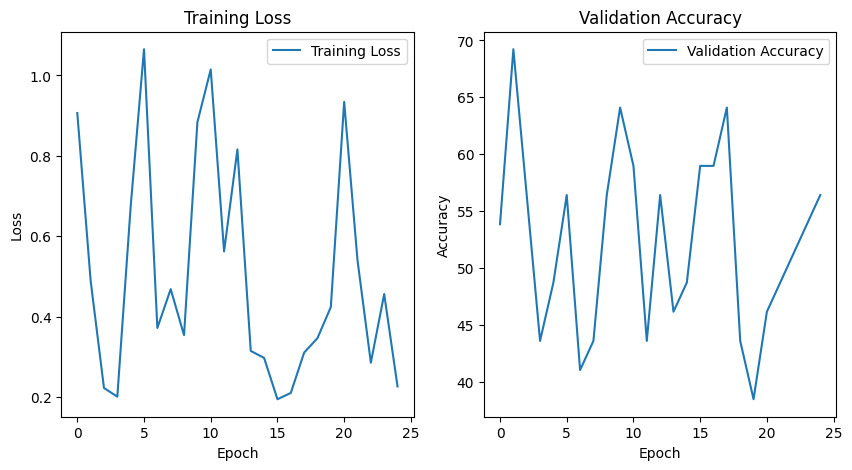

In [1]:
  # Import necessary libraries
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Step 1: Clone the GitHub repository
!git clone https://github.com/vikraj-ai/Pytorch
os.chdir('Pytorch')

# Step 2: Install necessary dependencies (if not already installed)
!pip install torch torchvision

# Step 3: Data Preprocessing
data_dir = './data'  # Path to your dataset folder
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomHorizontalFlip(),  # Data augmentation
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)
test_dataset = datasets.ImageFolder(val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 4: Define and Train Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load pre-trained ResNet model and modify the final layer
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))  # Adjust the output layer to match the number of classes

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to save the model
def save_model(model, path='currency_classifier.pth'):
    torch.save(model.state_dict(), path)
    print(f'Model saved to {path}')

# Function to test the model
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on test set: {accuracy:.2f}%')

# Training loop
num_epochs = 25
train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    val_accuracies.append(accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {accuracy:.2f}%')

# Save the trained model
save_model(model)

# Evaluate the model on the test set
test_model(model, test_loader)

# Plot training loss and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [9]:
from PIL import Image


def predict_image(image_path, model, class_names, transform):
    # Load the image
    image = Image.open(image_path).convert('RGB')

    # Apply transformations
    image = transform(image).unsqueeze(0)  # Add batch dimension

    # Move the image to the appropriate device
    image = image.to(device)

    # Set the model to evaluation mode
    model.eval()

    # Make prediction
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    # Get the predicted class
    predicted_class = class_names[predicted.item()]
    return predicted_class

# Example usage
class_names = train_dataset.classes
image_path = '/content/Pytorch/data/train/50/170385.jpg'  # Replace with your image path
predicted_class = predict_image(image_path, model, class_names, transform)
print(f'The predicted class is: {predicted_class}')

The predicted class is: 20


Cloning into 'Pytorch'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 193 (delta 31), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (193/193), 4.92 MiB | 33.14 MiB/s, done.
Resolving deltas: 100% (31/31), done.
Mounted at /content/drive
Epoch [1/25], Loss: 0.8719, Accuracy: 48.72%
Epoch [2/25], Loss: 0.2479, Accuracy: 46.15%
Epoch [3/25], Loss: 0.0991, Accuracy: 33.33%
Epoch [4/25], Loss: 0.0216, Accuracy: 35.90%
Epoch [5/25], Loss: 0.4472, Accuracy: 41.03%
Epoch [6/25], Loss: 0.3745, Accuracy: 41.03%
Epoch [7/25], Loss: 1.0178, Accuracy: 46.15%
Epoch [8/25], Loss: 0.8079, Accuracy: 46.15%
Epoch [9/25], Loss: 0.9026, Accuracy: 41.03%
Epoch [10/25], Loss: 0.7163, Accuracy: 51.28%
Epoch [11/25], Loss: 0.6008, Accuracy: 33.33%
Epoch [12/25], Loss: 1.4606, Accuracy: 33.33%
Epoch [13/25], Loss: 0.6718, Accuracy: 35.90%
Epoch [14/25], Loss: 0.6896, Accuracy: 43.59%
Epoch [

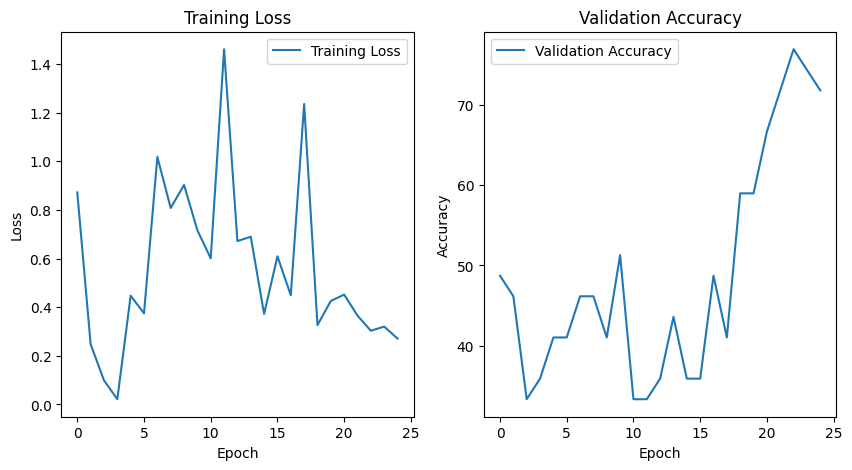

Model loaded from /content/drive/My Drive/currency_classifier.pth


FileNotFoundError: [Errno 2] No such file or directory: ' https://github.com/vikraj-ai/Pytorch'

In [10]:
# Import necessary libraries
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive

# Step 1: Clone the GitHub repository
!git clone  https://github.com/vikraj-ai/Pytorch
os.chdir('Pytorch')

# Step 2: Install necessary dependencies (if not already installed)
!pip install torch torchvision

# Step 3: Data Preprocessing
data_dir = './data'  # Path to your dataset folder
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'val')

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomHorizontalFlip(),  # Data augmentation
])

# Load datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 4: Define and Train Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load pre-trained ResNet model and modify the final layer
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))  # Adjust the output layer to match the number of classes

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Mount Google Drive
drive.mount('/content/drive')

# Function to save the model to Google Drive
def save_model_to_drive(model, drive_path='/content/drive/My Drive/currency_classifier.pth'):
    torch.save(model.state_dict(), drive_path)
    print(f'Model saved to {drive_path}')

# Function to load the model from Google Drive
def load_model_from_drive(model, drive_path='/content/drive/My Drive/currency_classifier.pth'):
    model.load_state_dict(torch.load(drive_path, map_location=device))
    model = model.to(device)
    print(f'Model loaded from {drive_path}')
    return model

# Function to test the model
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on test set: {accuracy:.2f}%')

# Training loop
num_epochs = 25
train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    val_accuracies.append(accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {accuracy:.2f}%')

# Save the trained model to Google Drive
save_model_to_drive(model)

# Evaluate the model on the test set
test_model(model, test_loader)

# Plot training loss and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Function to predict an image
def predict_image(image_path, model, class_names, transform):
    # Load the image
    image = Image.open(image_path).convert('RGB')

    # Apply transformations
    image = transform(image).unsqueeze(0)  # Add batch dimension

    # Move the image to the appropriate device
    image = image.to(device)

    # Set the model to evaluation mode
    model.eval()

    # Make prediction
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    # Get the predicted class
    predicted_class = class_names[predicted.item()]
    return predicted_class

# Example usage
class_names = train_dataset.classes
image_path = ' /content/Pytorch/data/train/50/121940.jpg'  # Replace with your image path

# Load the saved model from Google Drive
model = load_model_from_drive(model)

predicted_class = predict_image(image_path, model, class_names, transform)
print(f'The predicted class is: {predicted_class}')


In [13]:
def predict_image(image_path, model, class_names, transform):
    # Load the image
    image = Image.open(image_path).convert('RGB')

    # Apply transformations
    image = transform(image).unsqueeze(0)  # Add batch dimension

    # Move the image to the appropriate device
    image = image.to(device)

    # Set the model to evaluation mode
    model.eval()

    # Make prediction
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    # Get the predicted class
    predicted_class = class_names[predicted.item()]
    return predicted_class

# Example usage
class_names = train_dataset.classes
image_path = '/content/Pytorch/data/train/20/286219.jpg'  # Replace with your image path

# Load the saved model from Google Drive
model = load_model_from_drive(model)

predicted_class = predict_image(image_path, model, class_names, transform)
print(f'The predicted class is: {predicted_class}')


Model loaded from /content/drive/My Drive/currency_classifier.pth
The predicted class is: 20
